# コードのテスト
## predicter/grad_cam_util.py の関数について
- gradcamのutil関数について

## モジュールimport

In [10]:
# モジュールimport
import os, sys
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from dataset import util
from predicter import grad_cam_util

import keras
import matplotlib.pyplot as plt

## パラメータ設定

In [2]:
import os, sys, glob, time

class_name = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge'
os.makedirs(output_dir, exist_ok=True)

# 入力ディレクトリ
train_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
train_samples = util.file_count(train_data_dir, r'.JPG')+util.file_count(train_data_dir, r'.PNG')+util.file_count(train_data_dir, r'.jpg')+util.file_count(train_data_dir, r'.png') 
print('train_samples:', train_samples)

validation_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
val_samples = util.file_count(validation_data_dir, r'.JPG')+util.file_count(validation_data_dir, r'.PNG')+util.file_count(validation_data_dir, r'.jpg')+util.file_count(validation_data_dir, r'.png')
print('val_samples:', val_samples)

# テスト画像ディレクトリ
test_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\test'

# 入力層のサイズ
img_rows, img_cols, channels=331, 331, 3

# GradCamで切り出す層名
layer_name = 'multiply_3'

train_samples: 3309
val_samples: 338


## 1件ずつ予測+GradCam

In [3]:
# Custom Functionを使ったmodelを別環境で使用するには、modelをロードする際に引数として、[custom_objects]を指定するがある
# https://qiita.com/tkinjo1/items/51f9e2d0d9c4659bde8a
#load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))
load_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 165, 165, 96) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

__________________________________________________________________________________________________
separable_conv_2_bn_reduction_r (None, 83, 83, 42)   168         separable_conv_2_reduction_right3
__________________________________________________________________________________________________
reduction_left4_stem_1 (Average (None, 83, 83, 42)   0           reduction_add_1_stem_1[0][0]     
__________________________________________________________________________________________________
separable_conv_2_bn_reduction_l (None, 83, 83, 42)   168         separable_conv_2_reduction_left4_
__________________________________________________________________________________________________
reduction_right5_stem_1 (MaxPoo (None, 83, 83, 42)   0           reduction_bn_1_stem_1[0][0]      
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 166, 166, 96) 0           adjust_relu_1_stem_2[0][0]       
__________

__________________________________________________________________________________________________
separable_conv_1_reduction_righ (None, 42, 42, 84)   9156        activation_19[0][0]              
__________________________________________________________________________________________________
separable_conv_1_reduction_left (None, 42, 42, 84)   7812        activation_21[0][0]              
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 42, 42, 84)   0           separable_conv_1_bn_reduction_rig
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_r (None, 42, 42, 84)   336         separable_conv_1_reduction_right3
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_l (None, 42, 42, 84)   336         separable_conv_1_reduction_left4_
__________

__________________________________________________________________________________________________
activation_30 (Activation)      (None, 42, 42, 168)  0           adjust_bn_0[0][0]                
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 42, 42, 168)  0           normal_bn_1_0[0][0]              
__________________________________________________________________________________________________
separable_conv_1_normal_left1_0 (None, 42, 42, 168)  32424       activation_24[0][0]              
__________________________________________________________________________________________________
separable_conv_1_normal_right1_ (None, 42, 42, 168)  29736       activation_26[0][0]              
__________________________________________________________________________________________________
separable_conv_1_normal_left2_0 (None, 42, 42, 168)  32424       activation_28[0][0]              
__________

__________________________________________________________________________________________________
activation_34 (Activation)      (None, 42, 42, 336)  0           reduction_concat_stem_2[0][0]    
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 42, 42, 1008) 0           normal_concat_0[0][0]            
__________________________________________________________________________________________________
adjust_conv_projection_1 (Conv2 (None, 42, 42, 168)  56448       activation_34[0][0]              
__________________________________________________________________________________________________
normal_conv_1_1 (Conv2D)        (None, 42, 42, 168)  169344      activation_35[0][0]              
__________________________________________________________________________________________________
adjust_bn_1 (BatchNormalization (None, 42, 42, 168)  672         adjust_conv_projection_1[0][0]   
__________

normal_add_2_1 (Add)            (None, 42, 42, 168)  0           separable_conv_2_bn_normal_left2_
                                                                 separable_conv_2_bn_normal_right2
__________________________________________________________________________________________________
normal_add_3_1 (Add)            (None, 42, 42, 168)  0           normal_left3_1[0][0]             
                                                                 adjust_bn_1[0][0]                
__________________________________________________________________________________________________
normal_add_4_1 (Add)            (None, 42, 42, 168)  0           normal_left4_1[0][0]             
                                                                 normal_right4_1[0][0]            
__________________________________________________________________________________________________
normal_add_5_1 (Add)            (None, 42, 42, 168)  0           separable_conv_2_bn_normal_left5_
          

__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_2_normal_right1_2[
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 42, 42, 168)  672         separable_conv_2_normal_left2_2[0
__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_2_normal_right2_2[
__________________________________________________________________________________________________
normal_left3_2 (AveragePooling2 (None, 42, 42, 168)  0           normal_bn_1_2[0][0]              
__________________________________________________________________________________________________
normal_left4_2 (AveragePooling2 (None, 42, 42, 168)  0           adjust_bn_2[0][0]                
__________

__________________________________________________________________________________________________
activation_65 (Activation)      (None, 42, 42, 168)  0           separable_conv_1_bn_normal_left2_
__________________________________________________________________________________________________
activation_67 (Activation)      (None, 42, 42, 168)  0           separable_conv_1_bn_normal_right2
__________________________________________________________________________________________________
activation_69 (Activation)      (None, 42, 42, 168)  0           separable_conv_1_bn_normal_left5_
__________________________________________________________________________________________________
separable_conv_2_normal_left1_3 (None, 42, 42, 168)  32424       activation_61[0][0]              
__________________________________________________________________________________________________
separable_conv_2_normal_right1_ (None, 42, 42, 168)  29736       activation_63[0][0]              
__________

__________________________________________________________________________________________________
separable_conv_1_normal_right2_ (None, 42, 42, 168)  29736       activation_78[0][0]              
__________________________________________________________________________________________________
separable_conv_1_normal_left5_4 (None, 42, 42, 168)  29736       activation_80[0][0]              
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 42, 42, 168)  672         separable_conv_1_normal_left1_4[0
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 42, 42, 168)  672         separable_conv_1_normal_right1_4[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 42, 42, 168)  672         separable_conv_1_normal_left2_4[0
__________

__________________________________________________________________________________________________
normal_bn_1_5 (BatchNormalizati (None, 42, 42, 168)  672         normal_conv_1_5[0][0]            
__________________________________________________________________________________________________
activation_84 (Activation)      (None, 42, 42, 168)  0           normal_bn_1_5[0][0]              
__________________________________________________________________________________________________
activation_86 (Activation)      (None, 42, 42, 168)  0           adjust_bn_5[0][0]                
__________________________________________________________________________________________________
activation_88 (Activation)      (None, 42, 42, 168)  0           adjust_bn_5[0][0]                
__________________________________________________________________________________________________
activation_90 (Activation)      (None, 42, 42, 168)  0           adjust_bn_5[0][0]                
__________

                                                                 normal_bn_1_5[0][0]              
__________________________________________________________________________________________________
normal_concat_5 (Concatenate)   (None, 42, 42, 1008) 0           adjust_bn_5[0][0]                
                                                                 normal_add_1_5[0][0]             
                                                                 normal_add_2_5[0][0]             
                                                                 normal_add_3_5[0][0]             
                                                                 normal_add_4_5[0][0]             
                                                                 normal_add_5_5[0][0]             
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 42, 42, 1008) 0           normal_concat_5[0][0]            
__________

adjust_relu_1_7 (Activation)    (None, 42, 42, 1008) 0           normal_concat_4[0][0]            
__________________________________________________________________________________________________
reduction_add_2_reduce_6 (Add)  (None, 21, 21, 336)  0           reduction_left2_reduce_6[0][0]   
                                                                 separable_conv_2_bn_reduction_rig
__________________________________________________________________________________________________
reduction_left3_reduce_6 (Avera (None, 21, 21, 336)  0           reduction_bn_1_reduce_6[0][0]    
__________________________________________________________________________________________________
separable_conv_2_bn_reduction_r (None, 21, 21, 336)  1344        separable_conv_2_reduction_right3
__________________________________________________________________________________________________
reduction_left4_reduce_6 (Avera (None, 21, 21, 336)  0           reduction_add_1_reduce_6[0][0]   
__________

activation_108 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left1_
__________________________________________________________________________________________________
activation_110 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_right1
__________________________________________________________________________________________________
activation_112 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left2_
__________________________________________________________________________________________________
activation_114 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_right2
__________________________________________________________________________________________________
activation_116 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left5_
__________________________________________________________________________________________________
separable_

separable_conv_1_normal_right1_ (None, 21, 21, 336)  115920      activation_121[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left2_8 (None, 21, 21, 336)  121296      activation_123[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_right2_ (None, 21, 21, 336)  115920      activation_125[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left5_8 (None, 21, 21, 336)  115920      activation_127[0][0]             
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_1_normal_left1_8[0
__________________________________________________________________________________________________
separable_

normal_conv_1_9 (Conv2D)        (None, 21, 21, 336)  677376      activation_130[0][0]             
__________________________________________________________________________________________________
adjust_bn_9 (BatchNormalization (None, 21, 21, 336)  1344        adjust_conv_projection_9[0][0]   
__________________________________________________________________________________________________
normal_bn_1_9 (BatchNormalizati (None, 21, 21, 336)  1344        normal_conv_1_9[0][0]            
__________________________________________________________________________________________________
activation_131 (Activation)     (None, 21, 21, 336)  0           normal_bn_1_9[0][0]              
__________________________________________________________________________________________________
activation_133 (Activation)     (None, 21, 21, 336)  0           adjust_bn_9[0][0]                
__________________________________________________________________________________________________
activation

                                                                 normal_right4_9[0][0]            
__________________________________________________________________________________________________
normal_add_5_9 (Add)            (None, 21, 21, 336)  0           separable_conv_2_bn_normal_left5_
                                                                 normal_bn_1_9[0][0]              
__________________________________________________________________________________________________
normal_concat_9 (Concatenate)   (None, 21, 21, 2016) 0           adjust_bn_9[0][0]                
                                                                 normal_add_1_9[0][0]             
                                                                 normal_add_2_9[0][0]             
                                                                 normal_add_3_9[0][0]             
                                                                 normal_add_4_9[0][0]             
          

normal_left3_10 (AveragePooling (None, 21, 21, 336)  0           normal_bn_1_10[0][0]             
__________________________________________________________________________________________________
normal_left4_10 (AveragePooling (None, 21, 21, 336)  0           adjust_bn_10[0][0]               
__________________________________________________________________________________________________
normal_right4_10 (AveragePoolin (None, 21, 21, 336)  0           adjust_bn_10[0][0]               
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_2_normal_left5_10[
__________________________________________________________________________________________________
normal_add_1_10 (Add)           (None, 21, 21, 336)  0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________

separable_conv_2_normal_left1_1 (None, 21, 21, 336)  121296      activation_156[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right1_ (None, 21, 21, 336)  115920      activation_158[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left2_1 (None, 21, 21, 336)  121296      activation_160[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right2_ (None, 21, 21, 336)  115920      activation_162[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left5_1 (None, 21, 21, 336)  115920      activation_164[0][0]             
__________________________________________________________________________________________________
separable_

separable_conv_1_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_1_normal_right1_12
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_1_normal_left2_12[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_1_normal_right2_12
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_1_normal_left5_12[
__________________________________________________________________________________________________
activation_168 (Activation)     (None, 21, 21, 336)  0           separable_conv_1_bn_normal_left1_
__________________________________________________________________________________________________
activation

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




__________________________________________________________________________________________________
separable_conv_1_normal_left2_1 (None, 11, 11, 672)  468384      activation_218[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_right2_ (None, 11, 11, 672)  457632      activation_220[0][0]             
__________________________________________________________________________________________________
separable_conv_1_normal_left5_1 (None, 11, 11, 672)  457632      activation_222[0][0]             
__________________________________________________________________________________________________
separable_conv_1_bn_normal_left (None, 11, 11, 672)  2688        separable_conv_1_normal_left1_15[
__________________________________________________________________________________________________
separable_conv_1_bn_normal_righ (None, 11, 11, 672)  2688        separable_conv_1_normal_right1_15
_________

__________________________________________________________________________________________________
adjust_bn_16 (BatchNormalizatio (None, 11, 11, 672)  2688        adjust_conv_projection_16[0][0]  
__________________________________________________________________________________________________
normal_bn_1_16 (BatchNormalizat (None, 11, 11, 672)  2688        normal_conv_1_16[0][0]           
__________________________________________________________________________________________________
activation_226 (Activation)     (None, 11, 11, 672)  0           normal_bn_1_16[0][0]             
__________________________________________________________________________________________________
activation_228 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________________________________________________________________________________________________
activation_230 (Activation)     (None, 11, 11, 672)  0           adjust_bn_16[0][0]               
__________

__________________________________________________________________________________________________
normal_add_5_16 (Add)           (None, 11, 11, 672)  0           separable_conv_2_bn_normal_left5_
                                                                 normal_bn_1_16[0][0]             
__________________________________________________________________________________________________
normal_concat_16 (Concatenate)  (None, 11, 11, 4032) 0           adjust_bn_16[0][0]               
                                                                 normal_add_1_16[0][0]            
                                                                 normal_add_2_16[0][0]            
                                                                 normal_add_3_16[0][0]            
                                                                 normal_add_4_16[0][0]            
                                                                 normal_add_5_16[0][0]            
__________

__________________________________________________________________________________________________
normal_left4_17 (AveragePooling (None, 11, 11, 672)  0           adjust_bn_17[0][0]               
__________________________________________________________________________________________________
normal_right4_17 (AveragePoolin (None, 11, 11, 672)  0           adjust_bn_17[0][0]               
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 11, 11, 672)  2688        separable_conv_2_normal_left5_17[
__________________________________________________________________________________________________
normal_add_1_17 (Add)           (None, 11, 11, 672)  0           separable_conv_2_bn_normal_left1_
                                                                 separable_conv_2_bn_normal_right1
__________________________________________________________________________________________________
normal_add

__________________________________________________________________________________________________
separable_conv_2_normal_right1_ (None, 11, 11, 672)  457632      activation_253[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left2_1 (None, 11, 11, 672)  468384      activation_255[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_right2_ (None, 11, 11, 672)  457632      activation_257[0][0]             
__________________________________________________________________________________________________
separable_conv_2_normal_left5_1 (None, 11, 11, 672)  457632      activation_259[0][0]             
__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 11, 11, 672)  2688        separable_conv_2_normal_left1_18[
__________

### 画像表示あり（show_img=True）

util.py: loaded as module file
D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train\beagle\basset_IMG_4602.JPG


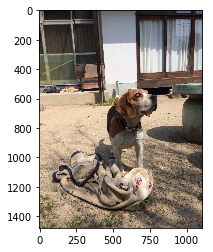

predict_score: [[9.9320036e-01 2.2546989e-04 2.1886245e-04 2.4051394e-04 3.6041671e-04
  7.4364746e-04 1.2542548e-03 2.9573580e-03 4.6697847e-04 1.5572734e-04
  1.7652751e-04]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  beagle
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)


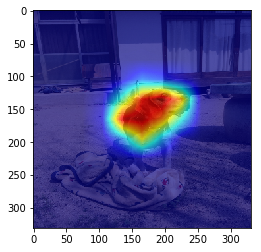

out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\beagle_basset_IMG_4602.JPG_pred_beagle_0.99.jpg


In [4]:
# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols
                                                   , layer_name=layer_name
                                                   , show_img=True
                                                  )

### 画像表示なし（show_img=False）

In [5]:
# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols
                                                   , layer_name=layer_name
                                                   , show_img=False
                                                  )

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train\beagle\basset_IMG_4602.JPG
predict_score: [[9.9320036e-01 2.2546989e-04 2.1886245e-04 2.4051394e-04 3.6041671e-04
  7.4364746e-04 1.2542548e-03 2.9573580e-03 4.6697847e-04 1.5572734e-04
  1.7652751e-04]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  beagle
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients_1/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)
out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\beagle_basset_IMG_4602.JPG_pred_beagle_0.99.jpg


## ディレクトリ内全件GradCam
### サブディレクトリなし 

In [6]:
from tqdm import tqdm
        
# 入力画像のディレクトリパス
pred_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10\test\bikini'
pred_paths = glob.glob(pred_dir+"/**")

for pred_path in tqdm(pred_paths):
    # 画像1件のファイルパスからgradcam実行+ファイル出力
        grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols
                                                            , layer_name=layer_name, show_img=False)

  0%|                                                                                  | 0/5 [00:00<?, ?it/s]

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10\test\bikini\abaya_IMG_8125.JPG
predict_score: [[8.51659861e-05 9.87665892e-01 1.34976275e-04 9.35099597e-05
  1.03963595e-02 1.26155341e-04 6.61438389e-04 5.89391915e-04
  1.14257309e-04 9.52629271e-05 3.75836426e-05]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  bikini
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients_2/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)
out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\bikini_abaya_IMG_8125.JPG_pred_bikini_0.99.jpg


 20%|██████████████▊                                                           | 1/5 [00:04<00:18,  4.73s/it]

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10\test\bikini\backpack_IMG_3192.JPG
predict_score: [[3.4571617e-04 8.4181988e-01 9.2043384e-04 6.4497086e-04 1.4681689e-01
  3.6901368e-03 1.6155310e-03 2.4362209e-03 5.7309773e-04 8.9125033e-04
  2.4581351e-04]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  bikini
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients_3/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)
out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\bikini_backpack_IMG_3192.JPG_pred_bikini_0.84.jpg


 40%|█████████████████████████████▌                                            | 2/5 [00:09<00:14,  4.77s/it]

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10\test\bikini\balloon_IMG_0024.JPG
predict_score: [[1.8944716e-04 9.8461598e-01 2.9976794e-04 2.0391055e-04 1.2158941e-02
  2.1346849e-04 9.6158579e-04 7.6575991e-04 2.5028572e-04 2.1561229e-04
  1.2531907e-04]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  bikini
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients_4/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)
out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\bikini_balloon_IMG_0024.JPG_pred_bikini_0.98.jpg


 60%|████████████████████████████████████████████▍                             | 3/5 [00:14<00:09,  4.78s/it]

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10\test\bikini\balloon_IMG_0050.JPG
predict_score: [[6.6974249e-06 9.9770004e-01 3.2695320e-06 2.0671853e-06 1.9925237e-03
  2.2156289e-06 1.8657699e-04 1.0234482e-04 2.4674757e-06 1.4262621e-06
  4.1139972e-07]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  bikini
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients_5/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)
out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\bikini_balloon_IMG_0050.JPG_pred_bikini_1.00.jpg


 80%|███████████████████████████████████████████████████████████▏              | 4/5 [00:19<00:04,  4.78s/it]

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10\test\bikini\balloon_IMG_0580.JPG
predict_score: [[3.91034300e-05 9.96717393e-01 3.70260568e-05 2.26677057e-05
  2.67806556e-03 2.47765838e-05 2.13275373e-04 2.05547258e-04
  2.69889479e-05 2.32449474e-05 1.19668985e-05]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  bikini
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients_6/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)
out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\bikini_balloon_IMG_0580.JPG_pred_bikini_1.00.jpg


100%|██████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.77s/it]


In [5]:
%debug

> c:\users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\predicter\base_predict.py(175)pred_from_1img()
    173         print("max_pred_label: ", classes[y])
    174 
--> 175     return y, predict[y][0]
    176 
    177 def pred_from_1X(model, X, classes=None):

ipdb> p y
1
ipdb> p predict[y][0]
*** IndexError: index 1 is out of bounds for axis 0 with size 1
ipdb> p predict[y]
*** IndexError: index 1 is out of bounds for axis 0 with size 1
ipdb> p predict[1]
*** IndexError: index 1 is out of bounds for axis 0 with size 1
ipdb> p predivt
*** NameError: name 'predivt' is not defined
ipdb> p predict
array([[8.51659861e-05, 9.87665892e-01, 1.34976275e-04, 9.35099597e-05,
        1.03963595e-02, 1.26155341e-04, 6.61438389e-04, 5.89391915e-04,
        1.14257309e-04, 9.52629271e-05, 3.75836426e-05]], dtype=float32)
ipdb> p predict[1][0]
*** IndexError: index 1 is out of bounds for axis 0 with size 1
ipdb> p predict[0][1]
0.9876659
ipdb> q


### サブディレクトリも含めて。またprint文を非表示にする
- print再表示させるにはカーネル再起動必要

In [6]:
from tqdm import tqdm
        
# 入力画像のディレクトリパス
pred_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_10\test'
pred_paths = glob.glob(pred_dir+"/**/*")

## print文を一時的に表示させないようにする
## print再表示させるにはカーネル再起動必要
## http://hyokonia.tumblr.com/post/6548673449/pythonprint%E6%96%87%E3%82%92%E4%B8%80%E6%99%82%E7%9A%84%E3%81%AB%E8%A1%A8%E7%A4%BA%E3%81%95%E3%81%9B%E3%81%AA%E3%81%84%E3%82%88%E3%81%86%E3%81%AB%E3%81%99%E3%82%8B
import io
output = io.StringIO()
sys.stdout = output

for pred_path in tqdm(pred_paths):
    # 画像1件のファイルパスからgradcam実行+ファイル出力
        grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols
                                                            , layer_name=layer_name, show_img=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [04:28<00:00,  4.82s/it]


### K.set_learning_phase 指定無しのGradCamとK.set_learning_phase(0) のGradCamは同じ結果になる 

D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train\beagle\basset_IMG_4602.JPG
predict_score: [[9.9320036e-01 2.2546989e-04 2.1886245e-04 2.4051394e-04 3.6041671e-04
  7.4364746e-04 1.2542548e-03 2.9573580e-03 4.6697847e-04 1.5572734e-04
  1.7652751e-04]]
classes: ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']
max_pred_label:  beagle
Tensor("multiply_3/mul:0", shape=(?, 11, 11, 4032), dtype=float32)
Tensor("gradients/FC_avg/Mean_grad/truediv:0", shape=(?, 11, 11, 4032), dtype=float32)
out_jpg: D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122_NASNetLarge\gradcam\TP\beagle_basset_IMG_4602.JPG_pred_beagle_0.99.jpg


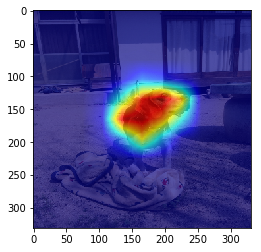

In [11]:
import keras.backend as K
K.clear_session()
K.set_learning_phase(0)

load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_img = grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols
                                                   , layer_name=layer_name, show_img=False)
plt.imshow(grad_cam_img)
plt.show()

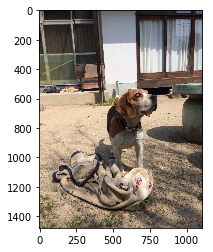

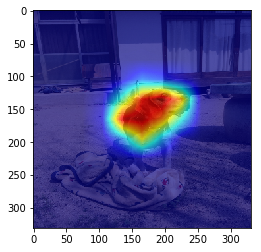

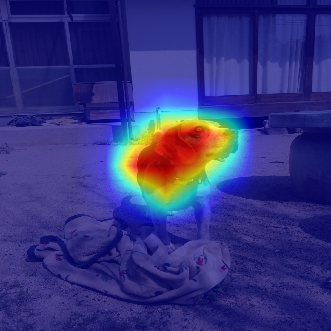

In [14]:
# print表示できるように設定もとに戻す
# http://hyokonia.tumblr.com/post/6548673449/pythonprint%E6%96%87%E3%82%92%E4%B8%80%E6%99%82%E7%9A%84%E3%81%AB%E8%A1%A8%E7%A4%BA%E3%81%95%E3%81%9B%E3%81%AA%E3%81%84%E3%82%88%E3%81%86%E3%81%AB%E3%81%99%E3%82%8B
sys.stdout = sys.__stdout__

from keras.preprocessing import image

import keras.backend as K
K.clear_session()
K.set_learning_phase(0)

#load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)

### K.set_learning_phase(1) はやっぱ間違い 
### K.set_learning_phase 指定無しのGradCamと違う結果になる 

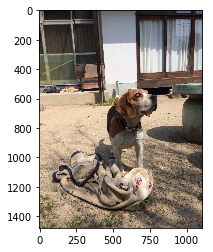

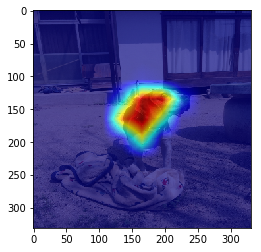

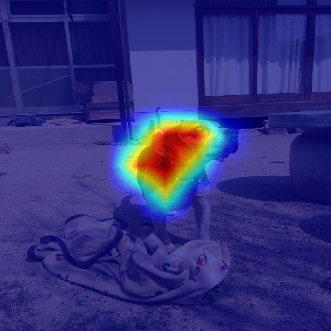

In [15]:
from keras.preprocessing import image

import keras.backend as K
K.clear_session()
K.set_learning_phase(1)

#load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), custom_objects={'lr':lr_metric})
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

# 入力画像のファイルパス
data_paths = glob.glob(train_data_dir+'/**', recursive=True)
pred_path = data_paths[50]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)

### 他の画像でもGradCam実行

In [16]:
import keras.backend as K
K.clear_session()
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'))

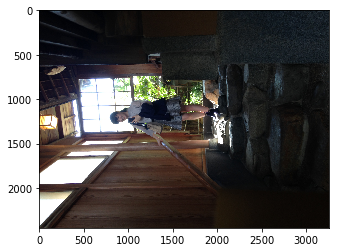

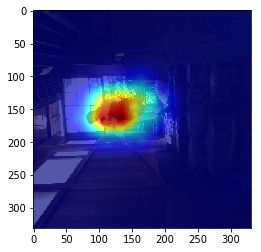

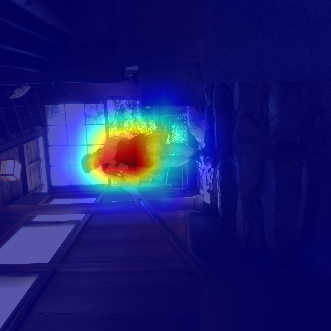

In [18]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[200]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)

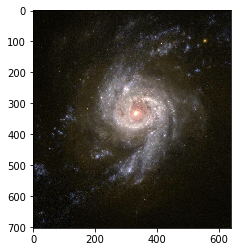

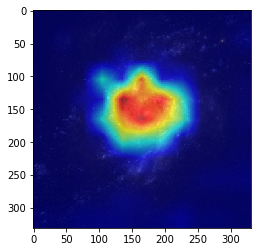

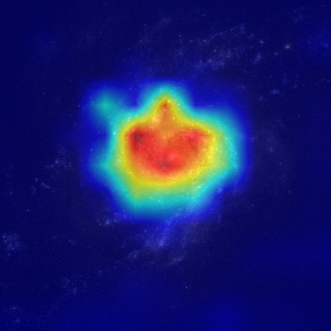

In [19]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[250]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)

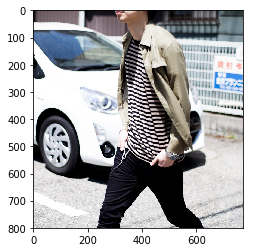

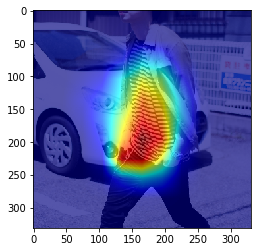

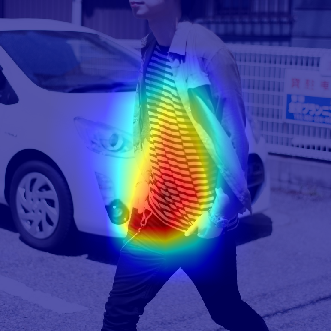

In [20]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[150]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)

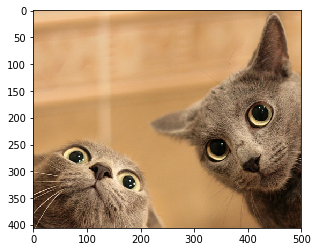

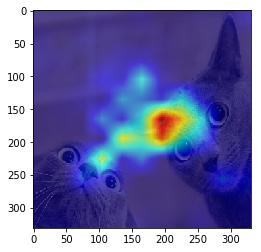

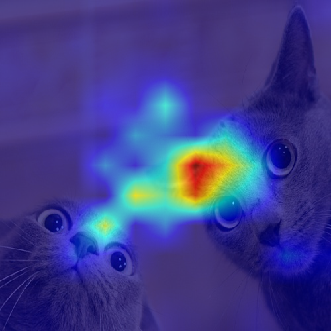

In [21]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[90]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)

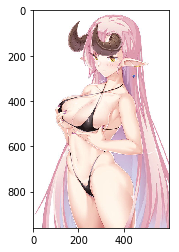

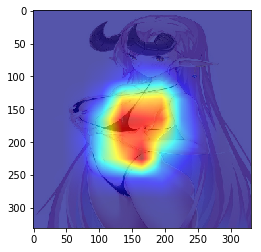

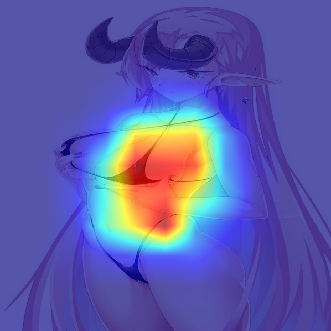

In [22]:
from keras.preprocessing import image

data_paths = glob.glob(validation_data_dir+'/**', recursive=True)
pred_path = data_paths[60]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)

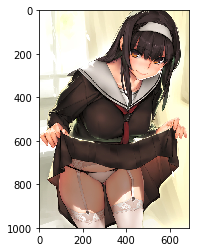

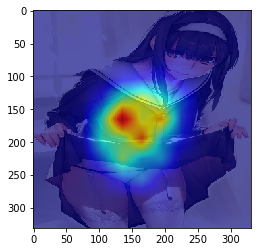

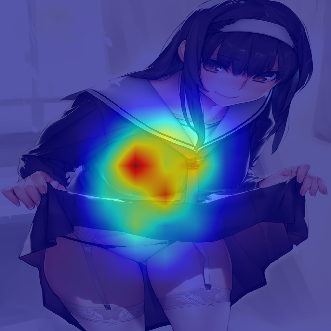

In [23]:
from keras.preprocessing import image

data_paths = glob.glob(test_dir+'/**', recursive=True)
pred_path = data_paths[13]

# 画像1件のファイルパスからgradcam実行+ファイル出力
grad_cam_util.gradcam_from_img_path(load_model, pred_path, output_dir, class_name, img_rows, img_cols, layer_name=layer_name)